# Binary Sentiment classification of IMDb Movie Reviews

##  <u> Problem Statement </u>

In this notebook, we will take a look at the famous **IMDb Movie Reviews Dataset**.All of the data used in this project is available due to the hard work of :<a href="https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.bib"> this team</a>.  The goal of this analysis is to observe how we can **clean** textual data and prepare a **Bag of Words** model on which we can run three classic **Supervised Machine Learning** Classification models. 

This analysis also heavily relies on the **<a href="https://www.nltk.org/">nltk</a>**(Natural Language Processing library) and I would thus like to give appropriate credit to the source,as requested: *Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.*








# <u>Contents:</u>

## <a href="#sec 1"> Section 1: Exploratory Data Analysis</a>
 <ol type="a">
  <li><a href="#1.1"> Necessary Imports</a></li>
  <li><a href="#1.2"> Understanding the Dataset</a></li>
  <li><a href="#1.3">  Cleaning Text,Pt. I: Tags</a></li>
  <li><a href="#1.4">Inspecting Polarity & Review lengths</a></li>  
  
</ol>


## <a href="#sec 2"> Section 2: Setting up the "Bag of Words" model</a>
 <ol type="a">
  <li><a href="#2.1"> Cleaning Text,Pt. II: Dealing with minor impurities</a></li>
  <li><a href="#2.2"> Bag of Words Model</a></li>

</ol>


## <a href="#sec 3"> Section 3: Supervised Classification Models  </a>
 <ol type="a">
  <li><a href="#3.1">Logistic Regression</a></li>
  <li><a href="#3.2">Decision Tree Classifier</a></li>
  <li><a href="#3.3">Support Vector Machine</a></li>
  
  
</ol>

## <a href="#sec 4"> Section 4: Conclusion </a>
 <ol type="a">
  <li><a href="#4.1">Evaluating results</a></li>
  <li><a href="#4.2">Future considerations</a></li>
  
</ol>

# <div id="sec 1">Section 1: Exploratory Data Analysis</div>

## <div id="1.1">1.1:  Necessary imports</div>

Before we get carried away, let's make some standard imports before we import the dataset as a pandas DataFrame and take a little peek into it. 

In [162]:
#Standard Data Analysis libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats 
from numpy import nan
import math
import matplotlib.mlab as mlab

import re  #Regular expressions

import warnings
warnings.filterwarnings('ignore')

We will make use of the classic **Natural Language Processing Library- nltk** in order to clean our reviews later on.

In [163]:
from nltk.corpus import stopwords

Another important library in our data-preprocessing step is **Beautiful Soup**, so let's import it right now in order to remove **HTML Tags** from our reviews.

In [164]:
from bs4 import BeautifulSoup

For some interesting visualizations in this section, we will require two more components:

In [165]:
from wordcloud import WordCloud 
from textblob import TextBlob

Now, with all of these tools under our belt, let's get started with our analysis.

## <div id="1.2">1.2: Understanding the dataset</div>

Let's import our dataset as a pandas DataFrame and take a peek into it.

In [166]:
df = pd.read_csv('IMDB Dataset.csv')

df_copy = df.copy()  #Backup

df.shape

(50000, 2)

In [167]:
df.head(n=10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [168]:
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

As we can see, there are **50,000** movie reviews for us to work with. Each review has a sentiment associated with it: either **positive or negative**. The question arises: do we have an **even** split of the two types of outcomes?

In [169]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

As we can see, there is a clear **50-50** split between the sentiment classes. This will help us **avoid bias** towards any particular outcome while we train our Machine Learning models. So, are we ready to use our classifiers right away?

In [170]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

This is the very first review(among 49,999 others), and right away we can see plenty of **impurities** in our text. HTML Tags, special characters(**, .  ' ! and such**), numerical character and stopwords.

So, let's get started with our cleaning procedure.

## <div id="1.3">1.3: Cleaning Text,Pt. I: Tags</div>

Using the Beautiful Soup Library that we've already imported, we can define a small function which will consume a review and crunch out the text devoid of any HTML Tags.

In [171]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")   #The clean text
    return soup.get_text()

To understand what's going on in each of our cleaning methods, we can inspect our impact on **a single review** in each step.

In [172]:
review = df['review'][0]
review =  strip_html(review)
review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

Now, let's manipulate some **Regular Expressions** and retain **only letters** (upper **and** lowercase, for now) from our review. In doing so, we can remove all numbers and special characters. Our main motive behind this cleaning process is to **reduce sparsity** in our **matrix of features**(which we will train our classification models on). The components which we are removing do not really carry any significant value in determining the sentiment of a given movie review.

It's important to note that we are effectively replacing any **non-letter characters** with whitespace.

In [173]:
review = re.sub('[^a-zA-Z]', " "    ,  strip_html(df['review'][0]) )

Before moving on, we will convert everything to **lowercase**.

In [174]:
review = review.lower()
review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

The review certainly looks much more **unstructured**(from an English Language perspective), but we now get started on some basic visualizations with our dataset. We can quickly apply the steps that we have applied on one review, on all 50,000 of them.

In [175]:
# Helper function-1
def keep_aplhabets(text):
    text = re.sub('[^a-zA-Z]', " "    ,  text ) 
    return text

# Helper function-2
def conv_to_lower(text):
    return text.lower()

In [176]:
df['review'] = df['review'].apply(strip_html)
df['review'] = df['review'].apply(keep_aplhabets)
df['review'] = df['review'].apply(conv_to_lower)

## <div id="1.4">1.4: Inspecting Polarity & Review lengths</div>

Using the powerful **TextBlob library** for Natural Language Processing, we can inspect the **polarity** of our movie reviews. 
This metric runs on a scale of **-1 to +1** and gives us a sense of the general tone of the given text. We can demonstrate this with a simple function.

In [177]:
def find_polarity(text):
    #Access the first element of the output vector
    return TextBlob(text).sentiment[0]

In [178]:
df['polarity'] = df['review'].apply(find_polarity)

Let's take a peek at our updated dataset.

In [179]:
df.head()

,review,sentiment,polarity
0,one of the other reviewers has mentioned that ...,positive,0.052316
1,a wonderful little production the filming tec...,positive,0.108308
2,i thought this was a wonderful way to spend ti...,positive,0.356198
3,basically there s a family where a little boy ...,negative,0.001389
4,petter mattei s love in the time of money is...,positive,0.214483


In [180]:
df.polarity.unique().max()

1.0

In [181]:
df.polarity.unique().min()

-1.0

The closer the polarity is to **-1**, the **more negative** the review and vice versa. Let's visualize the distribution of polarities.

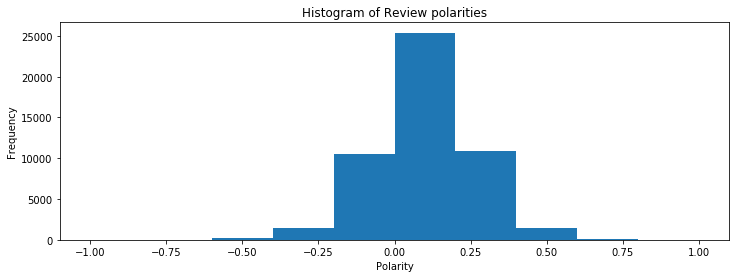

In [182]:
df.polarity.plot.hist(figsize=(12,4))
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.title('Histogram of Review polarities')
plt.show()

As we can see, most reviews have a **"neutral"** polarity (the distribution is centred around 0) even though we have explicitly pre-labelled positive and negative reviews in our dataset. 

We can now plot some **Word Clouds** in order to find the most frequent words in our reviews. Let's check reviews which have a polarity less than -0.5.

In [183]:
most_neg = df[df['polarity']<-0.5]
most_neg.shape

(56, 3)

In [184]:
most_neg.head()

,review,sentiment,polarity
84,we brought this film as a joke for a friend a...,negative,-0.561111
162,i can t believe it that was the worst movie i ...,negative,-0.542857
413,a rating of does not begin to express how ...,negative,-0.530556
1082,this movie is pathetic in every way possible ...,negative,-0.551349
1417,hated it with all my being worst movie ever ...,negative,-0.675000


Interestingly enough, we can see that the reviews are **very strongly worded**. Before we move on to the Word Cloud, let's remove some stopwords and **domain-specific** words (which add little/no value to our analysis). Recall that we've already imported **stopwords** from the **nltk library**.

In [185]:
forbidden = set(stopwords.words('english'))
forbidden.update(set(["movie","series","show","movie","film","watch","see","seen","movies","character"]))

Using a basic **list  comprehension**, we can prepare the words for the Word Cloud as follows:

In [186]:
negative_words =" ".join(rev for rev in most_neg.review)

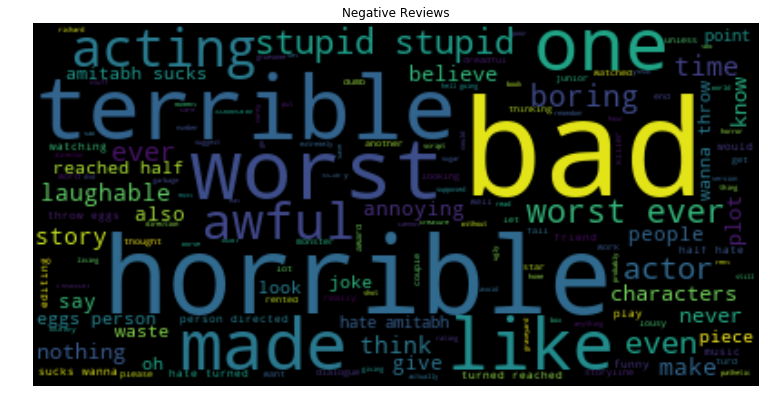

In [187]:
# Generate a word cloud image
plt.figure(figsize=(13,8))

wordcloud = WordCloud(stopwords=forbidden, background_color="black").generate(negative_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")
plt.show()

As expected, analyzing the dominant words in negative reviews gives us some pretty expected results. We can do the same for reviews with a strong positive polarity (**polarity > 0.5**).

In [188]:
most_pos = df[df['polarity'] > 0.5]
most_pos.shape

(453, 3)

In [189]:
most_pos.head()

,review,sentiment,polarity
205,a new way to enjoy goldsworthy s work rivers ...,positive,0.562338
232,i saw this movie in the theater and was thoro...,positive,0.517658
491,this movie does a great job of explaining the ...,positive,0.550000
832,as far as i know the real guy that the main ac...,positive,0.553032
853,so real and surreal all in one i remember fe...,positive,0.533333


In [190]:
positive_words =" ".join(rev for rev in most_pos.review)

Let's plot our Word Cloud for "positive-minded" reviews.

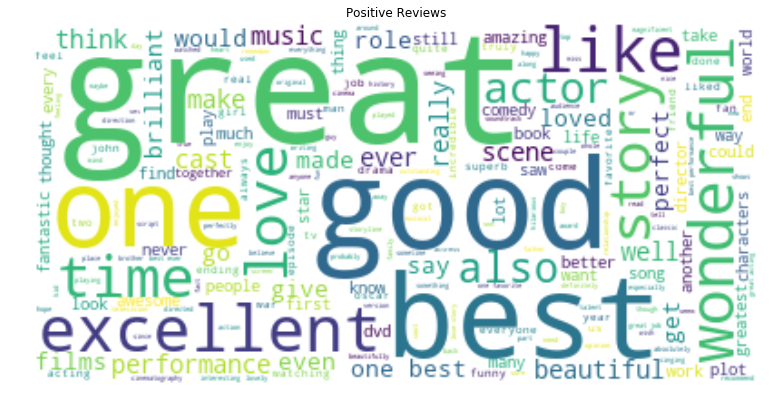

In [191]:
# Generate a word cloud image
plt.figure(figsize=(13,8))

wordcloud = WordCloud(stopwords=forbidden, background_color="white").generate(positive_words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")
plt.show()

Now that was an interesting detour from our main analysis. Before moving onto the next section, let's quickly analyze our **Movie Review lengths** and how they vary. We can define a function to help us carry this out.

In [192]:
def full_review_length(full_rev):
    #Split it into words
    full_rev =full_rev.split()
    return len(full_rev)
    
    

Let's quickly apply our mapping function.

In [193]:
df['review_length'] = df['review'].apply(full_review_length)
df.head()

,review,sentiment,polarity,review_length
0,one of the other reviewers has mentioned that ...,positive,0.052316,313
1,a wonderful little production the filming tec...,positive,0.108308,160
2,i thought this was a wonderful way to spend ti...,positive,0.356198,167
3,basically there s a family where a little boy ...,negative,0.001389,133
4,petter mattei s love in the time of money is...,positive,0.214483,228


Let's quickly visualize this.

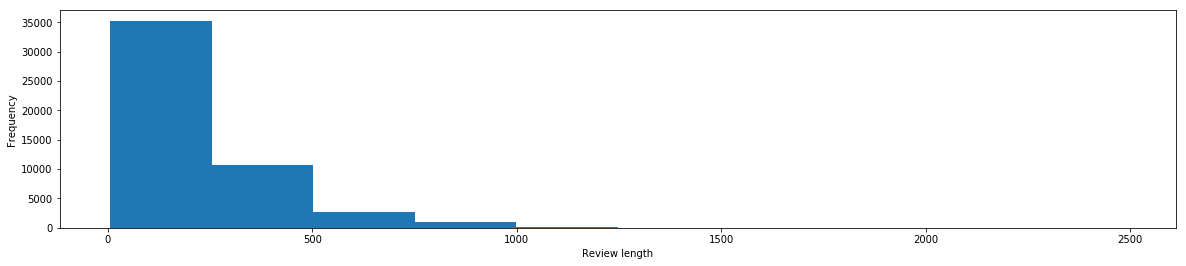

In [194]:
df.review_length.plot.hist(figsize=(20,4))
plt.xlabel('Review length')
plt.show()

 Most users submitted reviews shorter than **250 words** or so, but let's inspect this a bit more closely.

In [195]:
df.groupby('sentiment')['review_length'].mean()

sentiment
negative    232.60552
positive    235.67744
Name: review_length, dtype: float64

Finally, let's view a quick **summary** of this feature.

In [196]:
df.review_length.describe()

count    50000.000000
mean       234.141480
std        173.498958
min          6.000000
25%        128.000000
50%        176.000000
75%        284.000000
max       2487.000000
Name: review_length, dtype: float64

Let's investigate the shortest review.

In [197]:
df[df['review_length']==6].review

27521                     read the book  forget the movie 
28920    primary plot primary direction poor interpreta...
Name: review, dtype: object

Oddly enough, there were **two reviews** which were extremely short(and unsurprisingly, not very descriptive).

# <div id="sec 2">Section 2: Setting up the "Bag of Words" model</div>

## <div id="2.1">2.1: Cleaning Text,Pt. II: Dealing with minor impurities</div>

Recall that so far, we have:

<ul>
  <li>stripped HTML Tags</li>
  <li>Retained **only** Alphabets</li>
  <li>Converted all characters to **lowercase**</li>
</ul>

Now, we wil deal with the concepts of Stemming and Removing Stopwords. But before we do so, let's **drop the features** we created in the previous section as they were only added for Exploratory Data Analysis purposes.

In [198]:
df.drop(columns= ["review_length", "polarity"], axis =1, inplace = True)
df.shape

(50000, 2)

### Stopwords and Stemming

Basic stopwords such as *"a","the", "and"* ,etc. do not really add any significant value to the sentiment of a review. By filtering these components out, we will reduce the words in each review and retain (what we believe to be) the important bits. This will help us **reduce sparsity** in our Bag of Words model in the next section.

Another nifty technique we will employ is too keep only the **Root** of a given word. A quick example will demonstrate how effective this will turn out to be:

The word **Love** is the root of others such as **loving, loved, lover, etc.**. The main sentiment implied by the word in a given review is still effectively demonstrated by the root word alone, so we can thus **trim** our words even further.


In [199]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

Once again, let's demonstrate the effect of these two crucial steps on **one review** to see it in action.

In [200]:
review = df['review'][1]
review

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

Quickly define one helper function to carry out both **Stemming and Stopword-removal**.

In [201]:
def remove_sw_and_stem(text):
     #Split review into a list
    text = text.split()
    
    #Initialize Stemmer object
    ps = PorterStemmer()
    
    #Filter out stopwords and carry out Stemming
   # text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = [ps.stem(word) for word in text if not word in set(forbidden)]
    
    #Join into one string
    text = ' '.join(text)
    
    return text

In [202]:
remove_sw_and_stem(review)

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

As we can see, the resultant review makes hardly any grammatical sense, but the **key words** which will convey sentiment are present.

Let's go ahead and clean up our whole dataset before moving onto our Bag of Words model.

In [203]:
df['review'] = df['review'].apply(remove_sw_and_stem)

In [204]:
df.shape

(50000, 2)

## <div id="2.2">2.2: Bag of Words Model</div>

Finally, we are ready to implement our Bag of Words(**BoW**) model. Put simply, the logic of the **BoW** can be laid out as follows:
<ul>
  <li>Obtain a **vocabulary** of words from a given corpus</li>
  <li>Create a vector for each row in our DataFrame, where each column represents the **frequency** of each word obtained from the previous step</li>
  <li>Try to reduce Sparsity(trim the reviews in the corpus as much as possible while retaining the information)</li>
</ul>

The resultant **Matrix** can be used to train our classification models.




Let's define our **Corpus** before we implement a *Count Vectorizer* to create our BoW model. An important thing to mention here is the fact that we will be using the **first 5000 rows** of our dataset in order to keep computational demands to a manageable level. With a high-end processing unit, the Bag Of Words Model can be created from the *entire dataset*, but for the purposes of this basic analysis, we will work with 5000 reviews.

If the reader would like to follow along with the work in this notebook on their personal device, they are encouraged to train the models on the **full dataset** while keeping in mind the **high** computation time and power required.

In [205]:
# The first 5000 reviews of our dataset
df = df[:5000]

In [206]:
df.sentiment.value_counts()

negative    2532
positive    2468
Name: sentiment, dtype: int64

Our chosen subset gives a fairly even split of sentiments (albeit slightly weighed towards negative reviews).

In [207]:
# Define the corpus
corpus = list(df.review)

We can now read in one of our clean reviews.

In [208]:
corpus[6]

'sure would like see resurrect date seahunt seri tech today would bring back kid excit grew black white tv seahunt gunsmok hero everi week vote comeback new sea hunt need chang pace tv would work world water adventur oh way thank outlet like view mani viewpoint tv mani movi ole way believ got wanna say would nice read plu point sea hunt rhyme would line would let submit leav doubt quit must go let'

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
# Create an object
cv = CountVectorizer()

Go ahead and create the (*sparse*) Matrix of Features to train our models on. 

In [210]:
X = cv.fit_transform(corpus).toarray()

In [211]:
X.shape

(5000, 26315)

For 5000 reviews, we have **26315** unique words to count frequencies for. Let's specify our **Dependent Variable Vector** and carry out a simple **80-20** train-test split before we train our Supervised models.

In [212]:
y = df.iloc[:,1].values
y.shape

(5000,)

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70, random_state = 0)

We can finally proceed to the implementation of our Machine Learning models.

# <div id="sec 3"> Section 3: Supervised Classification Models </div>

In [214]:
#Import scikit-learn metrics module for accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Define a function to print out the Accuracy and Recall
def print_metrics(cm):
    TP = cm[0][0]    #True Positives
    FN = cm[0][1]    #False Negatives
    FP = cm[1][0]    #False Positives
    TN = cm[1][1]     #True Negative
    total_preds = np.sum(cm)

    prec = (TP)/(TP + FP)
    recall = (TP)/(TP + FN)
    
    print('Precision : {} -- Recall : {}'.format(prec, recall)) 




In this section, we will train three different Supervised Machine Learning models on our training set. The fully-prepped classifiers will then be run against the **Test dataset** for evaluation of accuracy. We can construct a **Confusion Matrix** and find out exactly how **precise** our model is, quantitatively.

**Precision** tells us, out of the reviews that we have classified as (say) positive, how many of them were **actually positive**.

We can also compute the **Recall score** for each model, which will come in handy if we associate the success of a model to be dependent on how many of the **True Positives** were **caught** by our model. This is particularly important if we consider a high number of **False Negatives**(positive reviews classified as **negative**) to be a **cost** for our Machine Learning model.

The three models which will be used to carry out this section are :
<ul>
  <li>Logistic Regression</li>
  <li>Decision Tree Classifier</li>
  <li>Support Vector Machine Classifier</li>
</ul>


## <div id="3.1">3.1: Logistic Regression</div>

Instead of reinventing the wheel, we can simply import the appropriate library from **sklearn** and fit it to our **Training dataset**.

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
# Create the classifier object
lr = LogisticRegression()

#Fit it
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

At long last, we can now make our prediction of movie review sentiments for each given user review.

In [217]:
y_pred = lr.predict(X_test)

How about the **Recall and Precision** for this model?

In [218]:
cm=confusion_matrix(y_test, y_pred)
print_metrics(cm)

Precision : 0.8324873096446701 -- Recall : 0.8232013385387619


It appears that the Logistic Regression model has given us an impressive classifier with **approximately 83%** precision. How do the other models fare in comparison?

## <div id="3.2">3.2: Decision Tree Classifier</div>

Utilizing sklearn's **Decision Tree classifier**, we can repeat the same procedure as in the previous section.

In [219]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
print_metrics(cm)

Precision : 0.6927570093457944 -- Recall : 0.6614612381483547


The score is much less impressive in this case, giving us a mere **69% precision**. Perhaps we will obtain a more impressive result with our next model.

## <div id="3.3">3.3: Support Vector Machine</div>

Using a **Linear Kernel**, we will setup our SVM Classifier and fit it as in the previous cases.

In [220]:
#Import svm model
from sklearn import svm

#Support Vector Machine Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


cm=confusion_matrix(y_test, y_pred)
print_metrics(cm)

Precision : 0.814238042269188 -- Recall : 0.8165086447295036


It seems that we have obtained a decent precision of **approximately 81%**.

# <div id="sec 4">Section 4: Conclusions </div>

## <div id="4.1">4.1: Evaluating results</div>

Let us reflect on our work in this notebook so far. We started with some **visual analysis** of Textual data and proceeded to **clean up ** our movie reviews. Keeping computational demands in mind, we created a **Bag of Words** model from the **first 5000** reviews out of our 50,000 reviews and trained three seperate classifiers on it.

Among the trio, the *Logistic Regression* model faired the best, followed closely by the *Support Vector Machine* classifier.
Both of them however, performed **significantly better** than the *Decision Tree Classifier* model.

## <div id="4.2">4.2: Future considerations</div>

A gaping weakness in our analysis was the fact that we decided to only work off a **subset** of the entire dataset. With a more powerful processing unit, one can train the model on the **entire dataset**(as mentioned previously). With more reviews used in this step, we can expect a more thoroughly prepared classifier which is *likely* to produce **more precise** results.

A future rerun of this project will aim to deal with this aspect.